In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visual style for professional looking plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default plot size

print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:
# specific to your folder structure:
# .. means "go up one level" (out of notebooks folder)
# then go into data/raw
file_path = os.path.join("..", "data", "raw", "insurance.csv")

try:
    df = pd.read_csv(file_path)
    print(f"Data Loaded. Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
except FileNotFoundError:
    print(f"❌ Error: Could not find file at {file_path}")

Data Loaded. Shape: (1338, 7)
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [3]:
# Check for null values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Drop duplicates if any (Standard practice)
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates dropped. New Shape: {df.shape}")

# Quick stats
df.describe()

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicate Rows: 1
Duplicates dropped. New Shape: (1337, 7)


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


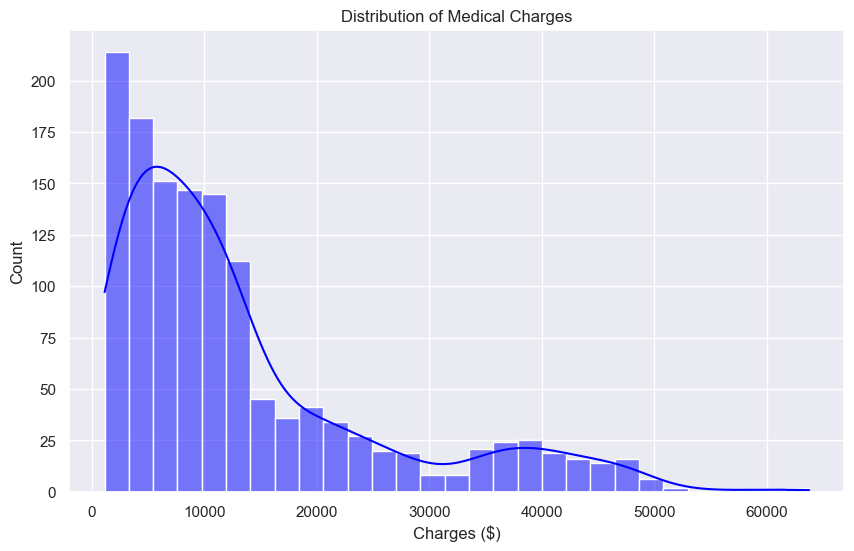

In [4]:
sns.histplot(df['charges'], kde=True, color='blue')
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges ($)")
plt.show()

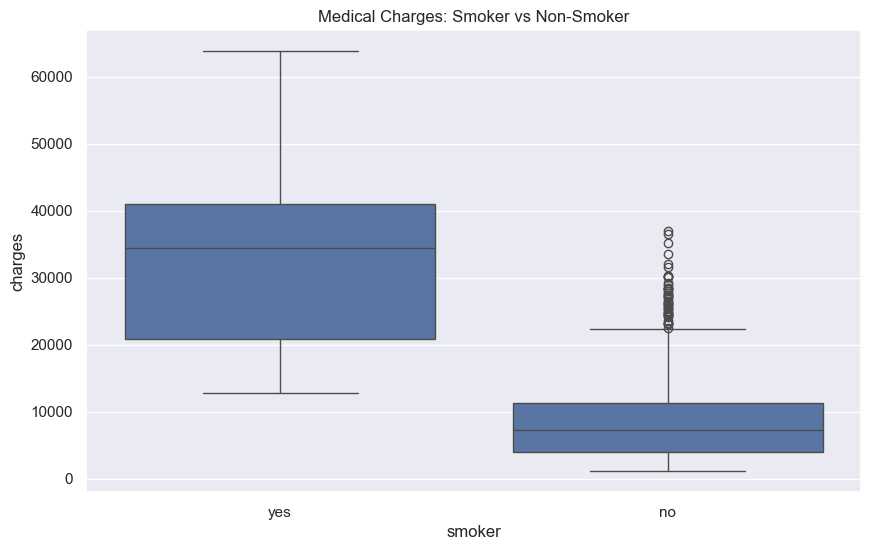

In [5]:
# Boxplot: Great for comparing categories
sns.boxplot(data=df, x='smoker', y='charges')
plt.title("Medical Charges: Smoker vs Non-Smoker")
plt.show()

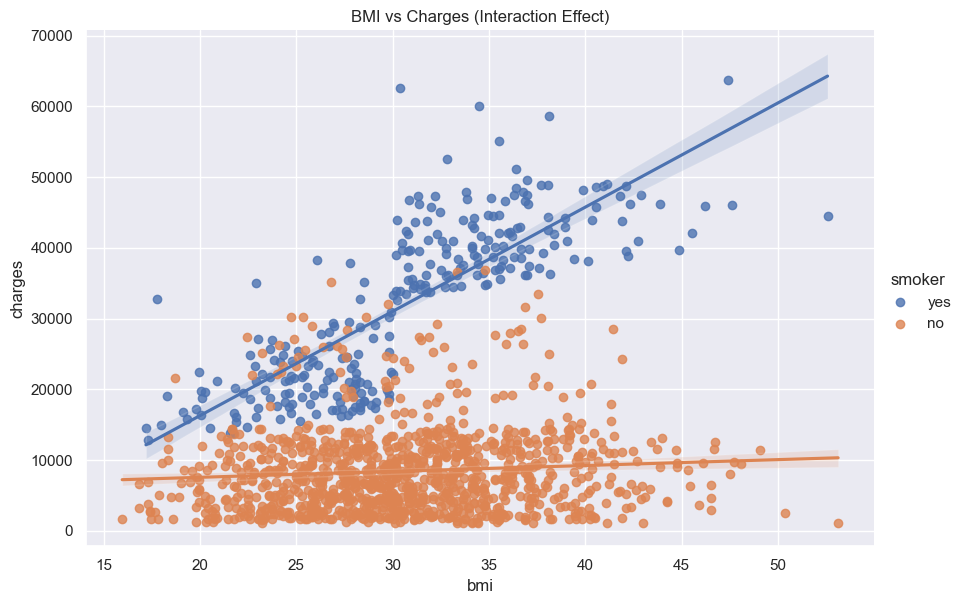

In [6]:
# Scatter plot with regression lines
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker', height=6, aspect=1.5)
plt.title("BMI vs Charges (Interaction Effect)")
plt.show()

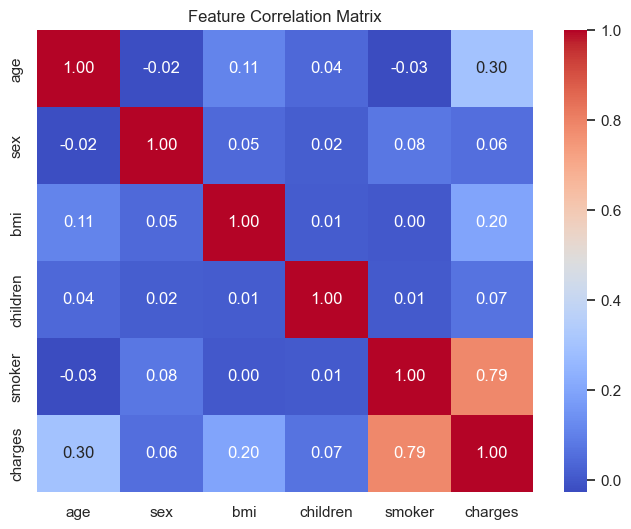

In [7]:
# simple encoding just for correlation map
df_temp = df.copy()
df_temp['smoker'] = df_temp['smoker'].map({'yes': 1, 'no': 0})
df_temp['sex'] = df_temp['sex'].map({'male': 1, 'female': 0})

# Calculate correlation
corr = df_temp.select_dtypes(include=np.number).corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()